In [85]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import itertools
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
import dtw

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [106]:
df_spx = yf.download(tickers = "^GSPC", period = "1d", start = "1970-03-01", end = "1973-03-01")
df_spx_covid = yf.download(tickers = "^GSPC", period = "1d", start = "2019-11-27", end = "2020-02-24")
df_spx_now = yf.download(tickers = "^GSPC", period = "1d", start = "2022-09-01")
df_spx_dot = yf.download(tickers = "^GSPC", period = "1d", start = "1998-07-01", end = "2001-02-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [107]:
scaler = MinMaxScaler()
df_spx_close = pd.DataFrame(df_spx["Close"])
df_spx_now_close = pd.DataFrame(df_spx_now["Close"])
df_spx_covid_close = pd.DataFrame(df_spx_covid["Close"])
df_spx_dot_close = pd.DataFrame(df_spx_dot["Close"])

nm_nparr_spx = scaler.fit_transform(df_spx_close)
nm_list_spx = nm_nparr_spx.tolist()
nm_df_spx = pd.DataFrame({"nm_Close": nm_list_spx})

nm_nparr_spx_covid = scaler.fit_transform(df_spx_covid_close)
nm_list_spx_covid = nm_nparr_spx_covid.tolist()
nm_df_spx_covid = pd.DataFrame({"nm_Close" : nm_list_spx_covid})

nm_nparr_spx_now = scaler.fit_transform(df_spx_now_close)
nm_list_spx_now = nm_nparr_spx_now.tolist()
nm_df_spx_now = pd.DataFrame({"nm_Close" : nm_list_spx_now})

nm_nparr_spx_dot = scaler.fit_transform(df_spx_dot_close)
nm_list_spx_dot = nm_nparr_spx_dot.tolist()
nm_df_spx_dot = pd.DataFrame({"nm_Close"}, nm_list_spx_dot)


df_spx_70 = pd.DataFrame({"ds" : df_spx.index, "y" : nm_df_spx["nm_Close"]})
df_spx_20 = pd.DataFrame({"ds" : df_spx_2020.index, "y" : nm_df_spx_20["nm_Close"]})
df_spx_covid = pd.DataFrame({"ds" : df_spx_covid.index, "y" : nm_df_spx_covid["nm_Close"]})
df_spx_covid.head()
#df_spx_23.reset_index(inplace=True)
#print(df_spx_70.round(5), df_spx_20.round(5))
#del df_spx_23['Date']

#dtw.dtw(nm_nparr_spx, nm_nparr_spx_20, keep_internals=True).plot(type="twoway")
spx_70_vs_now = dtw.dtw(nm_nparr_spx, nm_nparr_spx_now, keep_internals=True).distance
spx_dot_vs_now = dtw.dtw(nm_nparr_spx_dot, nm_nparr_spx_now, keep_internals=True).distance
spx_covid_vs_now = dtw.dtw(nm_nparr_spx_covid, nm_nparr_spx_now, keep_internals=True).distance
print(spx_70_vs_now, spx_dot_vs_now, spx_covid_vs_now, df_spx_covid)

19.421585552999325 27.21865720281749 14.058569465776877            ds                      y
0  2019-11-27  [0.20628073634724942]
1  2019-11-29  [0.16309963222640178]
2  2019-12-02  [0.07055869418287664]
3  2019-12-03                  [0.0]
4  2019-12-04  [0.06676928436241347]
5  2019-12-05  [0.08271030724471551]
6  2019-12-06  [0.17992821206027365]
7  2019-12-09  [0.14596353266001216]
8  2019-12-10  [0.13422111252138613]
9  2019-12-11  [0.16531810791192392]
10 2019-12-12  [0.25727984212320365]
11 2019-12-13  [0.25806489249726816]
12 2019-12-16   [0.3353815203142201]
13 2019-12-17   [0.3390342546980101]
14 2019-12-18  [0.33432311906680745]
15 2019-12-19   [0.3828987360022271]
16 2019-12-20  [0.43700304102846665]
17 2019-12-23  [0.44652698548156877]
18 2019-12-24   [0.4443760141275739]
19 2019-12-26   [0.5008021348036493]
20 2019-12-27   [0.5011779922545028]
21 2019-12-30  [0.43724222304264515]
22 2019-12-31  [0.46963680169477584]
23 2020-01-02   [0.5620418976884345]
24 2020-01-03  [0.4

In [29]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]


print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


In [30]:
warnings.filterwarnings("ignore")

for param in pdq :
    for param_seasonal in seasonal_pdq :
        try :
            mod = sm.tsa.statespace.SARIMAX(df_spx_23,
                                           order = param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            result = mod.fit()
            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

In [60]:
mod = sm.tsa.statespace.SARIMAX(df_spx_23,
                               order=(0, 1, 1),
                               seasonal_order = (0, 1, 1, 4),
                               enforce_stationarity=False,
                               enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [4]:
m = Prophet(daily_seasonality = True)
m.fit(df_spx_23)

22:17:47 - cmdstanpy - INFO - Chain [1] start processing
22:17:48 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods = 21)
future.tail()

,ds
712,1974-10-21
713,1974-10-22
714,1974-10-23
715,1974-10-24
716,1974-10-25


In [6]:
forecast = m.predict(future)
forecast['ds'].tail()

712   1974-10-21
713   1974-10-22
714   1974-10-23
715   1974-10-24
716   1974-10-25
Name: ds, dtype: datetime64[ns]

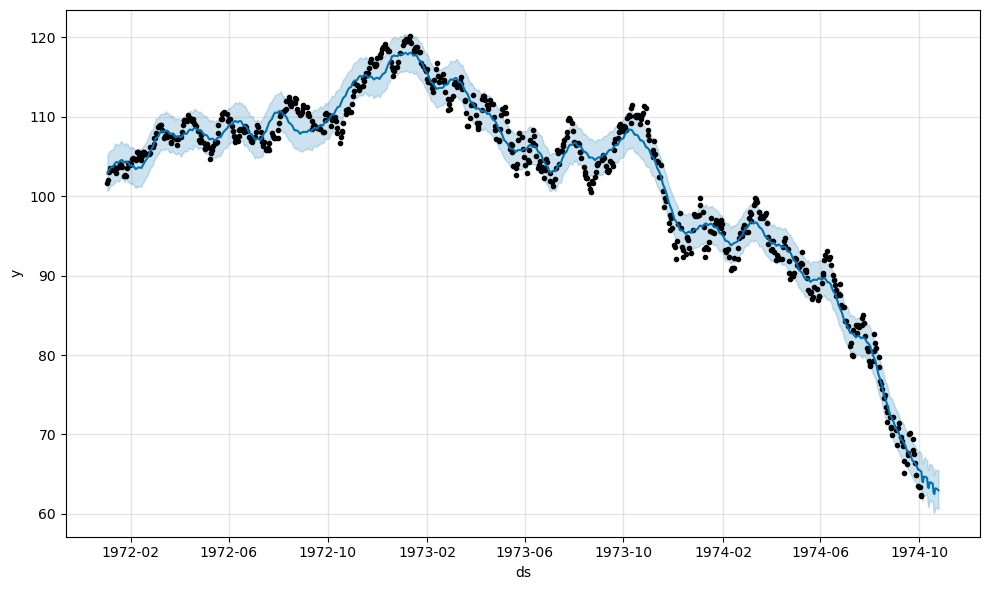

In [7]:
m.plot(forecast);